Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [5]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [6]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [7]:
# YOUR CODE GOES HERE
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [8]:
transactions['date'] = pd.to_datetime(transactions.date, format='%d.%m.%Y')
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month
transactions['day'] = transactions['date'].dt.day
transactions['revenue'] = transactions['item_price'] * transactions['item_cnt_day']
sep2014 = transactions[(transactions['year'] == 2014) & (transactions['month'] ==9)].copy()
sep2014.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,revenue
1953691,2014-09-24,20,5,1039,899.0,1.0,2014,9,24,899.0
1953692,2014-09-27,20,5,1015,449.0,1.0,2014,9,27,449.0
1953693,2014-09-07,20,5,1329,399.0,1.0,2014,9,7,399.0
1953694,2014-09-27,20,5,984,399.0,1.0,2014,9,27,399.0
1953695,2014-09-08,20,5,984,399.0,1.0,2014,9,8,399.0


In [9]:
# YOUR CODE GOES HERE

max_revenue = sep2014.groupby('shop_id')['revenue'].sum().max()
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [10]:
sales = transactions.merge(items, how='inner', on='item_id')
summer2014 = sales[(sales['year'] == 2014) & (sales['month'] >= 6) & (sales['month'] <= 8)].copy()
summer2014.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,revenue,item_name,item_category_id
66,2014-06-28,17,28,2552,949.0,1.0,2014,6,28,949.0,DEEP PURPLE The House Of Blue Light LP,58
120,2014-06-14,17,28,2555,1149.0,1.0,2014,6,14,1149.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
121,2014-06-13,17,54,2555,1149.0,1.0,2014,6,13,1149.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
122,2014-07-02,18,54,2555,1149.0,1.0,2014,7,2,1149.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
123,2014-08-30,19,54,2555,1149.0,1.0,2014,8,30,1149.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56


In [11]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = summer2014.groupby(['item_category_id'])['revenue'].sum().idxmax()
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [12]:
transactions.groupby('item_id')['item_price'].nunique().head()

item_id
0    1
1    1
2    1
3    2
4    1
Name: item_price, dtype: int64

In [13]:
# YOUR CODE GOES HERE

num_items_constant_price = (transactions.groupby('item_id')['item_price'].nunique()==1).sum()
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [14]:
shop_id = 25
shop25 = transactions[(transactions['year'] == 2014) & (transactions['month'] == 12) & (transactions['shop_id'] ==25)].copy()
summary = shop25.groupby('day')['item_cnt_day'].sum().reset_index()
summary

,day,item_cnt_day
0,1,153.0
1,2,169.0
2,3,195.0
3,4,164.0
4,5,300.0
5,6,350.0
6,7,325.0
7,8,209.0
8,9,204.0
9,10,143.0


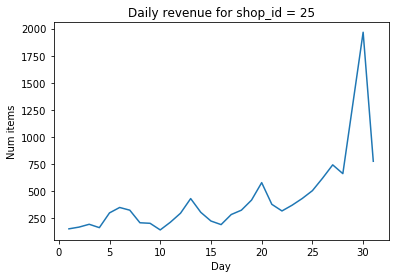

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [15]:
shop_id = 25

total_num_items_sold = summary['item_cnt_day'].values
days = summary['day'].values

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = summary['item_cnt_day'].var()
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [ ]:
STUDENT_EMAIL = # EMAIL HERE
STUDENT_TOKEN = # TOKEN HERE
grader.status()

In [ ]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Well done! :)